In [149]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [130]:
data = pd.read_csv("hourly_volume.csv")

In [131]:
data.head()

,order_hour,num_orders
0,2016-07-04 00:00:00,0
1,2016-07-04 01:00:00,0
2,2016-07-04 02:00:00,0
3,2016-07-04 03:00:00,0
4,2016-07-04 04:00:00,0


In [132]:
a=data.iloc[:,0].head()
a

0    2016-07-04 00:00:00
1    2016-07-04 01:00:00
2    2016-07-04 02:00:00
3    2016-07-04 03:00:00
4    2016-07-04 04:00:00
Name: order_hour, dtype: object

In [133]:
b=data['order_hour'].head()
b

0    2016-07-04 00:00:00
1    2016-07-04 01:00:00
2    2016-07-04 02:00:00
3    2016-07-04 03:00:00
4    2016-07-04 04:00:00
Name: order_hour, dtype: object

In [134]:
a==b

0    True
1    True
2    True
3    True
4    True
Name: order_hour, dtype: bool

In [135]:
data.head()

,order_hour,num_orders
0,2016-07-04 00:00:00,0
1,2016-07-04 01:00:00,0
2,2016-07-04 02:00:00,0
3,2016-07-04 03:00:00,0
4,2016-07-04 04:00:00,0


In [137]:
data.columns[0]

'order_hour'

In [138]:
#assuming that the first column is the time in time series.
#set the time as index
data=data.set_index(data.columns[0])
data.head()

,num_orders
order_hour,
2016-07-04 00:00:00,0
2016-07-04 01:00:00,0
2016-07-04 02:00:00,0
2016-07-04 03:00:00,0
2016-07-04 04:00:00,0


In [139]:
#low, mid, high level of extensiveness of p,d,q search
#low is fast, but less accurate
#high is slow, but most accurate
#ex
intensity = 'low'
if intensity == 'low':
    p = d = q = range(0,2)
if intensity == 'mid':
    p = d = q = range(0,3)
if intensity == 'high':
    p = d = q = range(0,4)

In [140]:
pdq = list(itertools.product(p,d,q))

In [141]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [142]:
data.head()

,num_orders
order_hour,
2016-07-04 00:00:00,0
2016-07-04 01:00:00,0
2016-07-04 02:00:00,0
2016-07-04 03:00:00,0
2016-07-04 04:00:00,0


In [143]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [144]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [154]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

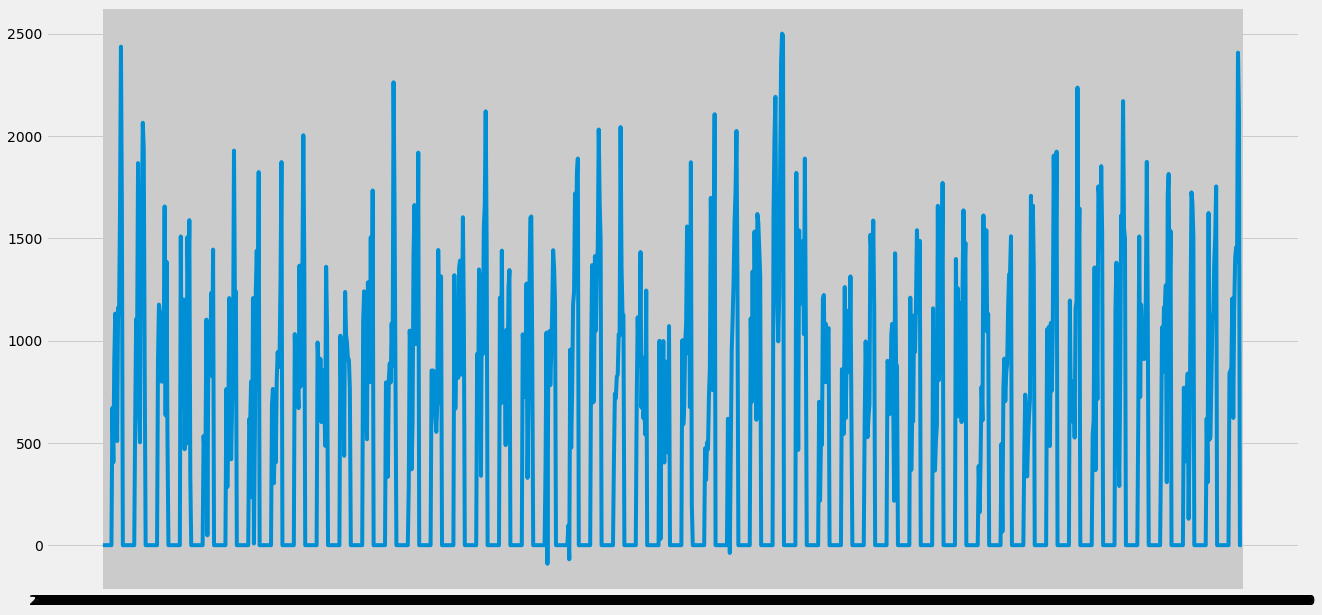

In [146]:
plt.figure(figsize=(20,10))
plt.plot(data)

In [150]:
#grid search - automation of finding parameters
aic = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append([param, param_seasonal, results.aic])
        except:
            continue

/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:19337.944215074727
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:19155.977201549438
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:19960.894323156077
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:18310.531376605526
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:19172.468181033466


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:18678.64474756887


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:17050.254296274423


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:17034.87924085231
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:18654.885575913933


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:18475.574554918672


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:19190.72878420528


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:17743.772370740473


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:18503.92032019636


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:17941.546312903338


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:17040.810290603753


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:17009.909759060283
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:18164.919810853753
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:17993.310819943752
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:18800.935187187722


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:17523.974573244865
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:18007.689258229737


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:17754.258694177064


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:17623.317195639618


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:17398.369861382816
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:18083.01116597323
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:17902.620141102394


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:18787.2474052703


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:17470.648263951007
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:17915.706222325367


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:17121.962931950857


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:17045.59535598435


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:17014.63225346181
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:18061.260972807897
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:17890.5851023117


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:18698.998440728785


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:17377.410176794525
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:17890.585099719236


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:17618.533457888887


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:17024.752723634156


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:17019.959053821047
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:18024.21996395272


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:17849.98846970593
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:18679.57431758922


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:17361.849893100283
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:17859.018474006712


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:17332.419339333457


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:17011.011445165088


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:16986.286278432664
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:18100.70956606931
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:17923.171350836765
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:18802.433211310767


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:17485.248398555756
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:17913.523447436564


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:17436.870436873003


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:17327.6592951194


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:17217.148755902017


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:17960.793876067448


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:17789.426733633096


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:18750.088843965495


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:17362.150234681743


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:17782.16853538409


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:17182.408744517707
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:17019.42920559658


/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:17010.964995997037


In [151]:
aic

[[(0, 0, 0), (0, 0, 0, 12), 19337.944215074727],
 [(0, 0, 0), (0, 0, 1, 12), 19155.977201549438],
 [(0, 0, 0), (0, 1, 0, 12), 19960.894323156077],
 [(0, 0, 0), (0, 1, 1, 12), 18310.531376605526],
 [(0, 0, 0), (1, 0, 0, 12), 19172.468181033466],
 [(0, 0, 0), (1, 0, 1, 12), 18678.64474756887],
 [(0, 0, 0), (1, 1, 0, 12), 17050.254296274423],
 [(0, 0, 0), (1, 1, 1, 12), 17034.87924085231],
 [(0, 0, 1), (0, 0, 0, 12), 18654.885575913933],
 [(0, 0, 1), (0, 0, 1, 12), 18475.574554918672],
 [(0, 0, 1), (0, 1, 0, 12), 19190.72878420528],
 [(0, 0, 1), (0, 1, 1, 12), 17743.772370740473],
 [(0, 0, 1), (1, 0, 0, 12), 18503.92032019636],
 [(0, 0, 1), (1, 0, 1, 12), 17941.546312903338],
 [(0, 0, 1), (1, 1, 0, 12), 17040.810290603753],
 [(0, 0, 1), (1, 1, 1, 12), 17009.909759060283],
 [(0, 1, 0), (0, 0, 0, 12), 18164.919810853753],
 [(0, 1, 0), (0, 0, 1, 12), 17993.310819943752],
 [(0, 1, 0), (0, 1, 0, 12), 18800.935187187722],
 [(0, 1, 0), (0, 1, 1, 12), 17523.974573244865],
 [(0, 1, 0), (1, 0, 0, 1

In [152]:
#finding the best parameters
gen = (x for x in aic)
from operator import itemgetter
p=min(gen, key=itemgetter(2))
p

[(1, 0, 1), (1, 1, 1, 12), 16986.286278432664]

In [155]:
#use the best (lowest AIC) parameters
#to fit the ARIMA time series model
mod = sm.tsa.statespace.SARIMAX(data,
                                order=p[0],
                                seasonal_order=p[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7554      0.066     11.464      0.000       0.626       0.885
ma.L1         -0.6114      0.077     -7.935      0.000      -0.762      -0.460
ar.S.L12      -0.8791      0.014    -61.497      0.000      -0.907      -0.851
ma.S.L12      -0.3225      0.032     -9.973      0.000      -0.386      -0.259
sigma2      1.115e+05   3447.833     32.353      0.000    1.05e+05    1.18e+05


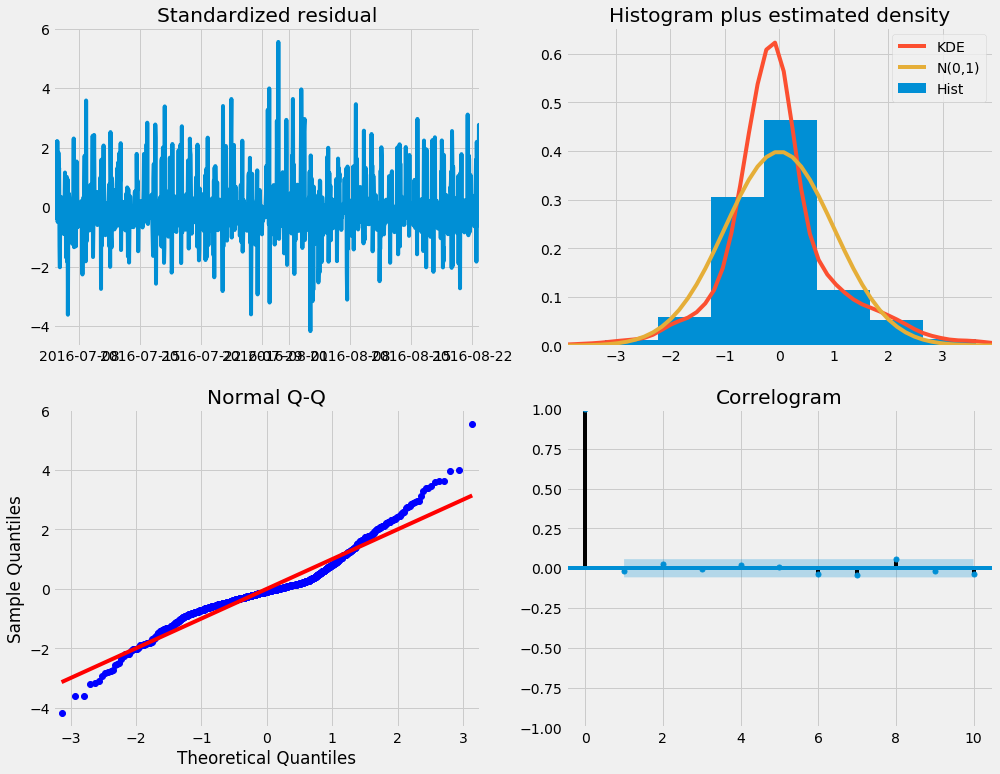

In [156]:
#run model diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [157]:
#predict
# Get forecast 500 steps (hours in this case) ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [162]:
ax = data.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')

plt.legend()
plt.show()

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x111d6f378> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x1080 with 1 Axes>

In [161]:
pred_uc.predicted_mean

2016-08-23 00:00:00     328.864559
2016-08-23 01:00:00     -42.244629
2016-08-23 02:00:00      72.483914
2016-08-23 03:00:00       8.139296
2016-08-23 04:00:00      39.143746
2016-08-23 05:00:00      57.041388
2016-08-23 06:00:00     147.241986
2016-08-23 07:00:00     -31.731633
2016-08-23 08:00:00      85.318025
2016-08-23 09:00:00       4.560978
2016-08-23 10:00:00     748.529124
2016-08-23 11:00:00     726.135395
2016-08-23 12:00:00     787.311034
2016-08-23 13:00:00    1042.737779
2016-08-23 14:00:00     546.221637
2016-08-23 15:00:00    1010.191955
2016-08-23 16:00:00    1231.056850
2016-08-23 17:00:00    1282.878992
2016-08-23 18:00:00    1234.107866
2016-08-23 19:00:00    2110.817409
2016-08-23 20:00:00    1871.458135
2016-08-23 21:00:00      -0.762281
2016-08-23 22:00:00      89.479471
2016-08-23 23:00:00      87.015552
2016-08-24 00:00:00     383.708978
2016-08-24 01:00:00      88.465155
2016-08-24 02:00:00     129.419636
2016-08-24 03:00:00     129.009337
2016-08-24 04:00:00 

In [ ]:
#function
def forecast_arima(data_file, intensity, days_forward):
    data = pd.read_csv(data_file)
    data[]